## Load the Dataset

In [114]:
import pandas as pd

df = pd.read_csv("/content/Fifa Worldcup 2022.csv")
df.head()

,Sl. No,Match No.,Team,Against,Group,Goal,Possession (%),Inside Penalty Area,Outside Penalty Area,Assists,...,Fouls Against,Offsides,Passes,Passes Completed,Crosses,Crosses Completed,Corners,Free Kicks,Penalties Scored,Pts
0,1,1,Qatar,Ecuador,A,0,40,0,0,0,...,15,3,453,387,10,5,1,19,0,0
1,2,1,Ecuador,Qatar,A,2,46,2,0,1,...,15,4,484,419,26,10,3,17,1,3
2,3,2,England,Iran,B,6,69,6,0,6,...,9,2,810,733,29,9,8,16,0,3
3,4,2,Iran,England,B,2,20,2,0,1,...,14,2,232,156,11,3,0,10,1,0
4,5,3,Senegal,Netherlands,A,0,39,0,0,0,...,13,2,391,326,22,8,6,14,0,0


## Feature Engineering

In [115]:
import numpy as np

df['ShootingAccuracy'] = df['On Target'] / df['Total Attempts'].replace(0, np.nan)
df['PassAccuracy']     = df['Passes Completed'] / df['Passes'].replace(0, np.nan)
df['CrossAccuracy']    = df['Crosses Completed'] / df['Crosses'].replace(0, np.nan)
df['Discipline'] = df['Yellow Cards'] + 2*df['Red Cards']
df['PossessionPerShot'] = df['Possession (%)'] / df['Total Attempts'].replace(0, np.nan)
df['GoalConversion'] = df['Goal'] / df['Total Attempts'].replace(0, np.nan)
df['ShotsPerPossession'] = df['Total Attempts'] / (df['Possession (%)'].replace(0, np.nan) / 10)


df = df.fillna(0)

df[['ShootingAccuracy','PassAccuracy','CrossAccuracy','Discipline','PossessionPerShot', 'GoalConversion', 'ShotsPerPossession']].head()


,ShootingAccuracy,PassAccuracy,CrossAccuracy,Discipline,PossessionPerShot,GoalConversion,ShotsPerPossession
0,0.000000,0.854305,0.500000,4,8.000000,0.000000,1.250000
1,1.000000,0.865702,0.384615,2,9.200000,0.400000,1.086957
2,0.538462,0.904938,0.310345,0,5.307692,0.461538,1.884058
3,0.375000,0.672414,0.272727,2,2.500000,0.250000,4.000000
4,0.266667,0.833760,0.363636,2,2.600000,0.000000,3.846154


## Define Target Variables

In [116]:
df['Result'] = df['Pts'].map({3: 'Win', 1: 'Draw', 0: 'Loss'})
df.head(10)

,Sl. No,Match No.,Team,Against,Group,Goal,Possession (%),Inside Penalty Area,Outside Penalty Area,Assists,...,Penalties Scored,Pts,ShootingAccuracy,PassAccuracy,CrossAccuracy,Discipline,PossessionPerShot,GoalConversion,ShotsPerPossession,Result
0,1,1,Qatar,Ecuador,A,0,40,0,0,0,...,0,0,0.000000,0.854305,0.500000,4,8.000000,0.000000,1.250000,Loss
1,2,1,Ecuador,Qatar,A,2,46,2,0,1,...,1,3,1.000000,0.865702,0.384615,2,9.200000,0.400000,1.086957,Win
2,3,2,England,Iran,B,6,69,6,0,6,...,0,3,0.538462,0.904938,0.310345,0,5.307692,0.461538,1.884058,Win
3,4,2,Iran,England,B,2,20,2,0,1,...,1,0,0.375000,0.672414,0.272727,2,2.500000,0.250000,4.000000,Loss
4,5,3,Senegal,Netherlands,A,0,39,0,0,0,...,0,0,0.266667,0.833760,0.363636,2,2.600000,0.000000,3.846154,Loss
5,6,3,Netherlands,Senegal,A,2,41,2,0,1,...,0,3,0.300000,0.844639,0.269231,2,4.100000,0.200000,2.439024,Win
6,7,4,United States,Wales,B,1,51,1,0,1,...,0,1,0.166667,0.894552,0.129032,4,8.500000,0.166667,1.176471,Draw
7,8,4,Wales,United States,B,1,39,1,0,0,...,1,1,0.428571,0.784841,0.400000,2,5.571429,0.142857,1.794872,Draw
8,9,5,Argentina,Saudi Arabia,C,1,51,1,0,0,...,1,0,0.428571,0.885329,0.416667,0,3.642857,0.071429,2.745098,Loss
9,10,5,Saudi Arabia,Argentina,C,2,24,2,0,1,...,0,3,0.666667,0.726592,0.333333,6,8.000000,0.666667,1.250000,Win


## Choosing Features

In [117]:
X = df.drop(['Sl. No','Match No.','Team','Against','Group','Pts','Result'], axis=1)
y = df['Result']

## Train/Test split

In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

## Train a model

In [119]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [120]:
y_pred_rf = rf.predict(X_test)

## Evaluate the Model

In [121]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

0.7307692307692307
              precision    recall  f1-score   support

        Draw       0.00      0.00      0.00         4
        Loss       0.64      0.82      0.72        11
         Win       0.83      0.91      0.87        11

    accuracy                           0.73        26
   macro avg       0.49      0.58      0.53        26
weighted avg       0.62      0.73      0.67        26

[[ 0  4  0]
 [ 0  9  2]
 [ 0  1 10]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Visualization

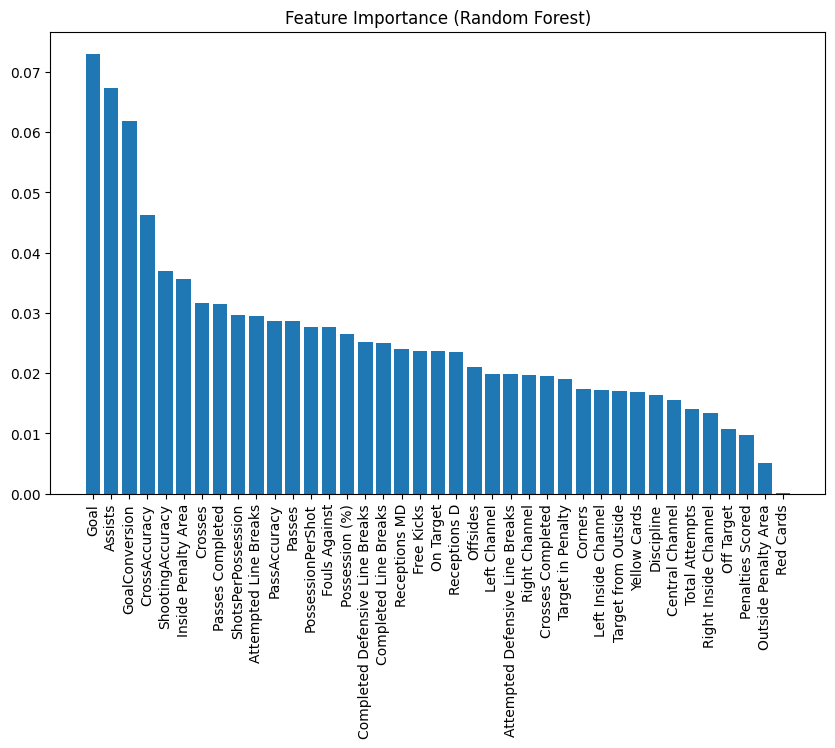

In [122]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
feat_names = X_train.columns

# sort by importance
indices = importances.argsort()[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feat_names[indices], rotation=90)
plt.title("Feature Importance (Random Forest)")
plt.show()

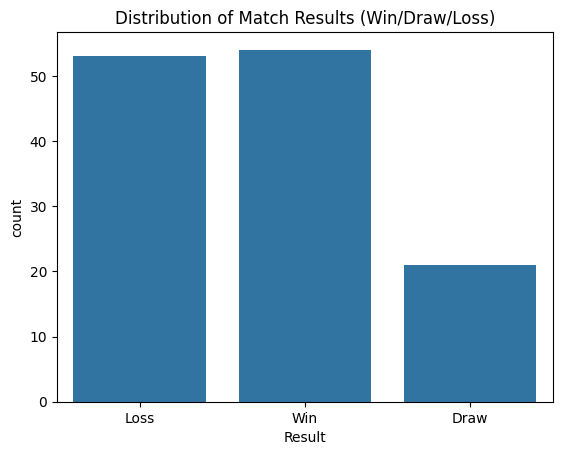

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Result', data=df)
plt.title('Distribution of Match Results (Win/Draw/Loss)')
plt.show()

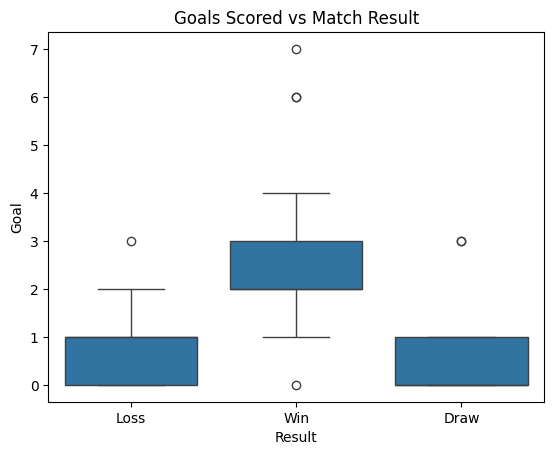

In [124]:
sns.boxplot(x='Result', y='Goal', data=df)
plt.title('Goals Scored vs Match Result')
plt.show()

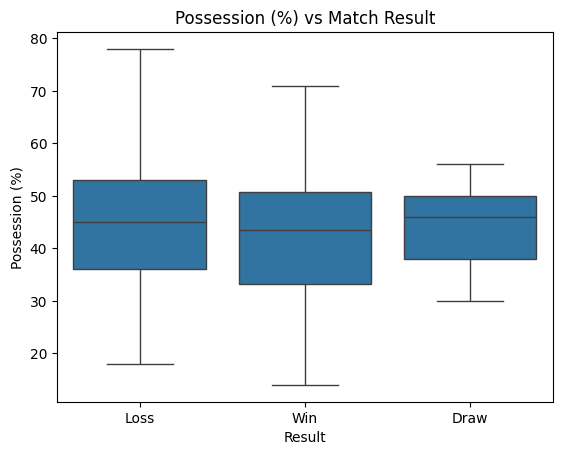

In [125]:
sns.boxplot(x='Result', y='Possession (%)', data=df)
plt.title('Possession (%) vs Match Result')
plt.show()

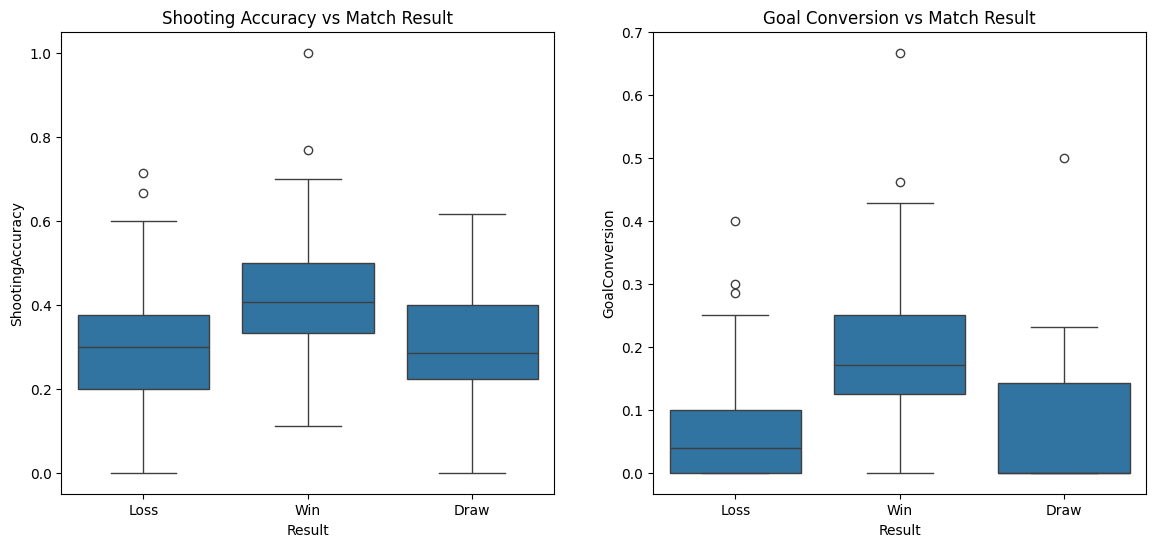

In [126]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.boxplot(x='Result', y='ShootingAccuracy', data=df, ax=axes[0])
axes[0].set_title('Shooting Accuracy vs Match Result')

sns.boxplot(x='Result', y='GoalConversion', data=df, ax=axes[1])
axes[1].set_title('Goal Conversion vs Match Result')

plt.show()

In [127]:
from ipywidgets import interact, FloatSlider, IntSlider
import pandas as pd
import matplotlib.pyplot as plt

# Features used for training
features = X.columns.tolist()
default_values = X.mean()  # use average for other features

def predict_match_ui(
    Goal=IntSlider(min=0, max=10, value=1, description='Goals'),
    Possession=FloatSlider(min=0, max=100, value=50, description='Possession (%)'),
    ShootingAccuracy=FloatSlider(min=0, max=100, value=50, description='ShootingAcc'),
    GoalConversion=FloatSlider(min=0, max=50, value=10, description='GoalConv'),
    Assists=IntSlider(min=0, max=10, value=1, description='Assists'),
    InsidePenalty=IntSlider(min=0, max=20, value=5, description='Inside Penalty')
):
    # If Goal = 0, set Assists = 0 for consistency
    if Goal == 0:
        Assists = 0

    # Start with default numeric values
    match_input = default_values.copy()

    # Replace 6 key features with user input
    match_input['Goal'] = Goal
    match_input['Possession (%)'] = Possession
    match_input['ShootingAccuracy'] = ShootingAccuracy
    match_input['GoalConversion'] = GoalConversion
    match_input['Assists'] = Assists
    match_input['Inside Penalty Area'] = InsidePenalty

    # Convert to DataFrame
    match_input = pd.DataFrame([match_input])

    # Predict using Random Forest
    pred = rf.predict(match_input)[0]
    proba = rf.predict_proba(match_input)[0]

    # Map probabilities to correct classes
    prob_dict = dict(zip(rf.classes_, proba))

    # Display prediction
    print(f"Predicted Result: {pred}\n")

    # Display probabilities
    for cls in ['Win','Draw','Loss']:
        print(f"{cls} Probability: {prob_dict.get(cls,0):.2f}")

    # Bar chart
    plt.figure(figsize=(6,4))
    plt.bar(prob_dict.keys(), prob_dict.values(), color=['green','orange','red'])
    plt.title('Prediction Probabilities')
    plt.ylabel('Probability')
    plt.ylim(0,1)
    plt.show()

# Create the interactive interface
interact(predict_match_ui)

interactive(children=(IntSlider(value=1, description='Goals', max=10), FloatSlider(value=50.0, description='Po…

<function __main__.predict_match_ui(Goal=IntSlider(value=1, description='Goals', max=10), Possession=FloatSlider(value=50.0, description='Possession (%)'), ShootingAccuracy=FloatSlider(value=50.0, description='ShootingAcc'), GoalConversion=FloatSlider(value=10.0, description='GoalConv', max=50.0), Assists=IntSlider(value=1, description='Assists', max=10), InsidePenalty=IntSlider(value=5, description='Inside Penalty', max=20))>